In [ ]:
##Pandas describe()se utiliza para ver algunos detalles estadísticos básicos como percentil, media, estándar, etc. de un marco de datos o una serie de valores numéricos. Cuando este método se aplica a una serie de strings

##https://barcelonageeks.com/python-metodo-pandas-dataframe-describe/

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
!pip install seaborn
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 383.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 481.4 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 874.6 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 930.9 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 930.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 729.9 kB/s eta 0:00:00


In [ ]:
#cargamos los datos de entrada
data = pd.read_excel("C:/Users/yjzabalam/Downloads/Datacvs.xlsx")
#veamos cuantas dimensiones y registros contiene
data.shape
data.head()

,No,Productos,Vendedor,Ventas,stok
0,1,Jabón de lavanda,Ana,20,1
1,2,Pasta de dientes blanqueadora,Carlos,25,5
2,3,Cepillo de dientes eléctrico,Beatriz,30,15
3,4,Champú anticaspa,Daniel,35,45
4,5,Acondicionador hidratante,Elena,40,135


In [ ]:
 #Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,No,Ventas,stok
count,25.000000,25.000000,25.000000
mean,13.000000,80.000000,145.640000
std,7.359801,36.799004,62.288228
min,1.000000,20.000000,1.000000
25%,7.000000,50.000000,141.000000
50%,13.000000,80.000000,159.000000
75%,19.000000,110.000000,185.000000
max,25.000000,140.000000,215.000000


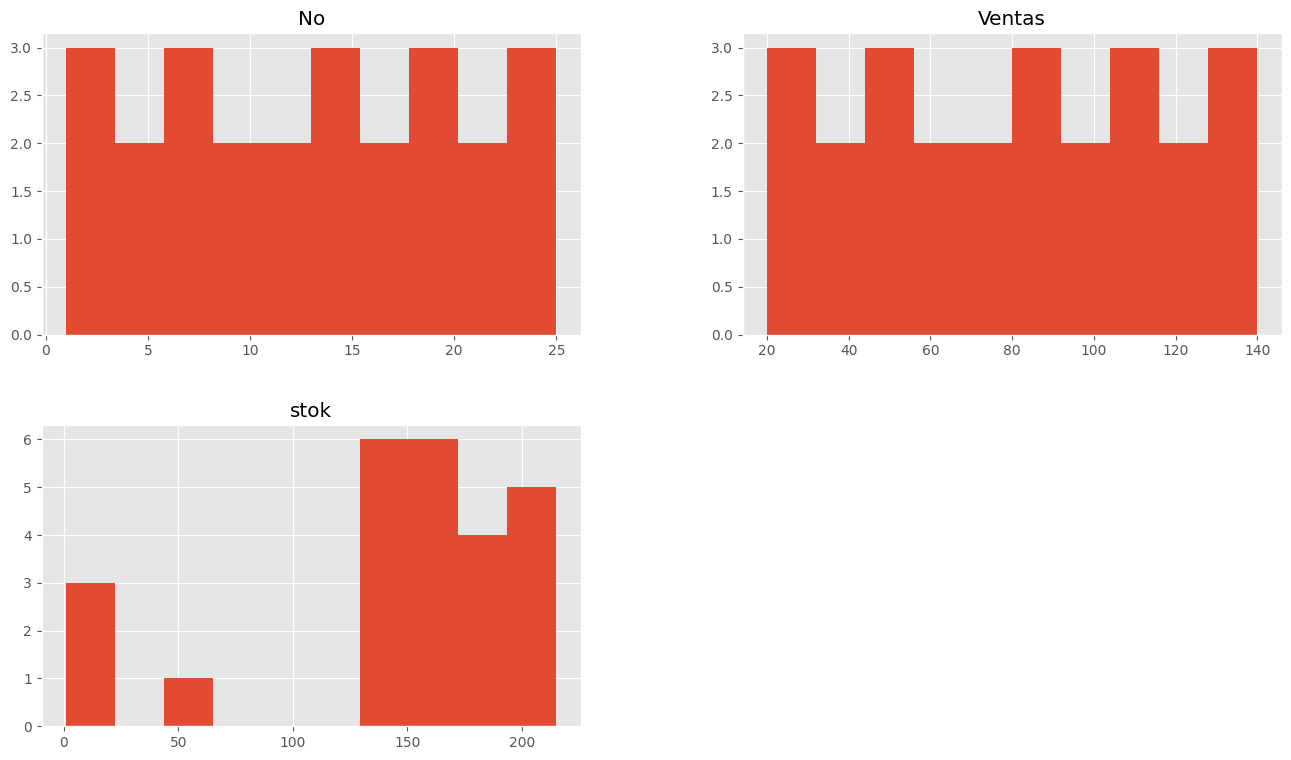

In [ ]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Productos','Vendedor'], axis=1).hist()
plt.show()


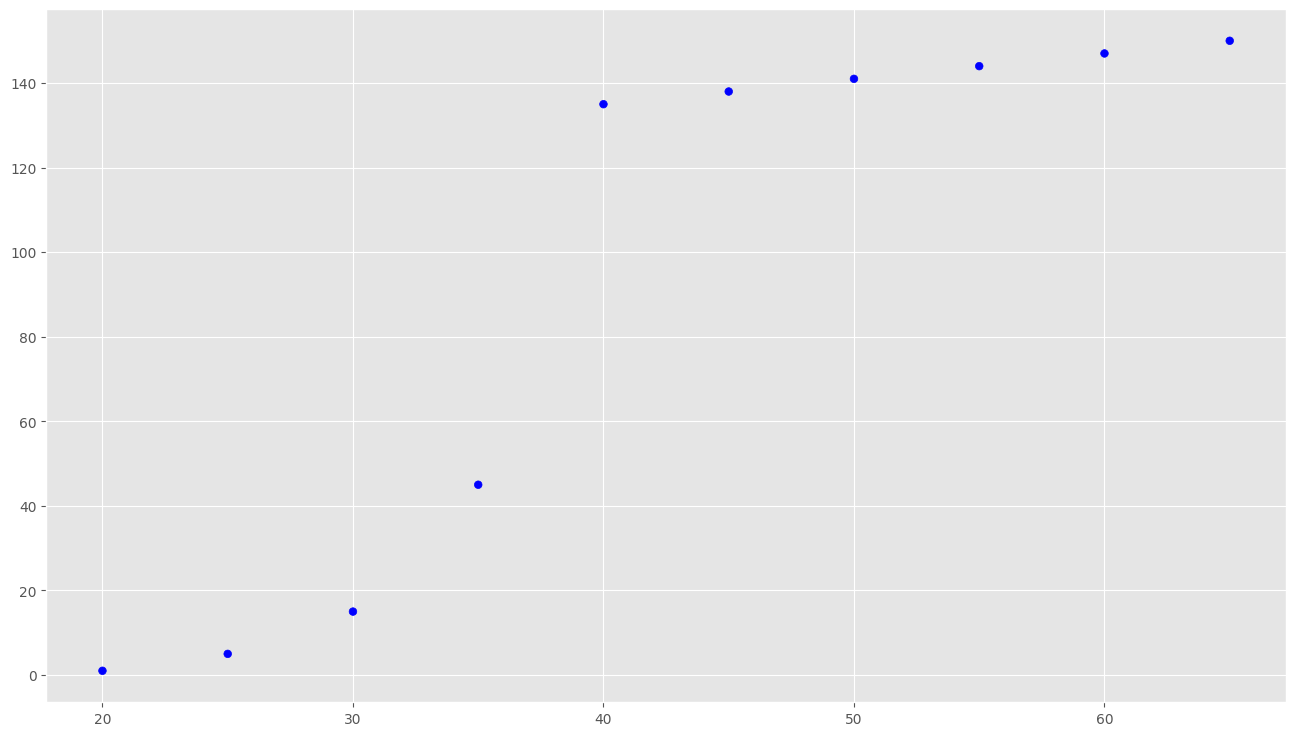

In [ ]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 200
# y en el eje Y: entre 0 y 200000
filtered_data = data[(data['Ventas'] <= 200) & (data['stok'] <= 150)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Ventas'].values
f2 = filtered_data['stok'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Ventas']>108):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Ventas"]]
X_train = np.array(dataX)
y_train = filtered_data['stok'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [3.96484848]
Independent term: 
 -76.4060606060606
Mean squared error: 702.44
Variance score: 0.82


In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_doscientos = regr.predict([[200]])

print(int(y_doscientos[0]))


716


In [ ]:
# importing pandas module
import pandas as pd

# importing regex module
import re

# making data frame
data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")

# removing null values to avoid errors
data.dropna(inplace = True)

# percentile list
perc =[.20, .40, .60, .80]

# list of dtypes to include
include =['object', 'float', 'int']

# calling describe method
desc = data.describe(percentiles = perc, include = include)

# display
desc

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,364,364,364.000000,364,364.000000,364,364.000000,364,3.640000e+02
unique,364,30,NaN,5,NaN,17,NaN,115,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,6-9,NaN,Kentucky,NaN
freq,1,16,NaN,87,NaN,49,NaN,22,NaN
mean,NaN,NaN,16.829670,NaN,26.615385,NaN,219.785714,NaN,4.620311e+06
std,NaN,NaN,14.994162,NaN,4.233591,NaN,24.793099,NaN,5.119716e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,5.572200e+04
20%,NaN,NaN,4.000000,NaN,23.000000,NaN,195.000000,NaN,9.472760e+05
40%,NaN,NaN,9.000000,NaN,25.000000,NaN,212.000000,NaN,1.638754e+06
50%,NaN,NaN,12.000000,NaN,26.000000,NaN,220.000000,NaN,2.515440e+06
